<a href="https://colab.research.google.com/github/halimahsitti/StudiIndependen/blob/main/Sitti_Halimah_dari_Content_Analyst_Netflix_Visualization_With_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix is an application that keeps growing bigger and faster with its popularity, shows and content. This is an EDA or a story telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals.**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Loading the dataset

In [4]:
!wget -O netflix_titles.csv https://raw.githubusercontent.com/kirancakra/Machine-Learning-Netflix-/main/netflix_titles.csv

--2022-03-30 15:47:14--  https://raw.githubusercontent.com/kirancakra/Machine-Learning-Netflix-/main/netflix_titles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3000491 (2.9M) [text/plain]
Saving to: ‘netflix_titles.csv’

netflix_titles.csv  100%[===================>]   2.86M  --.-KB/s    in 0.04s   

2022-03-30 15:47:15 (71.0 MB/s) - ‘netflix_titles.csv’ saved [3000491/3000491]



In [5]:
netflix_overall=pd.read_csv("https://raw.githubusercontent.com/kirancakra/Machine-Learning-Netflix-/main/netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/kirancakra/Machine-Learning-Netflix-/main/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [7]:
type(df[["type", "release_year",	"rating", "listed_in"]])
df[["type", "release_year",	"rating", "listed_in"]]

,type,release_year,rating,listed_in
0,TV Show,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,2016,TV-MA,"Dramas, International Movies"
2,Movie,2011,R,"Horror Movies, International Movies"
3,Movie,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,2008,PG-13,Dramas
...,...,...,...,...
7782,Movie,2005,TV-MA,"Dramas, International Movies"
7783,Movie,2015,TV-14,"Dramas, International Movies, Music & Musicals"
7784,Movie,2019,TV-MA,"Documentaries, International Movies, Music & M..."
7785,TV Show,2019,TV-PG,"International TV Shows, Reality TV"


In [8]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']


In [9]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

# Analysis of Movies vs TV Shows.

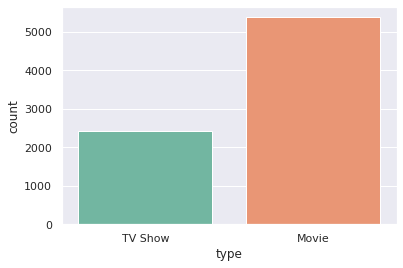

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

Berdasarkan proses analisis data yang sudah kita lakukan, secara umum dapat disimpulkan bahwa jumlah konten Movie dan TV Show di Netflix cenderung meningkat di setiap country nya. Terlihat dalam diagram analysis of Movie vs TV Show yaitu Netflix Movie countnya mencapai >5000 sedangakan Netflix TV Show hanya >2000 saja. 

# Movie ratings analysis

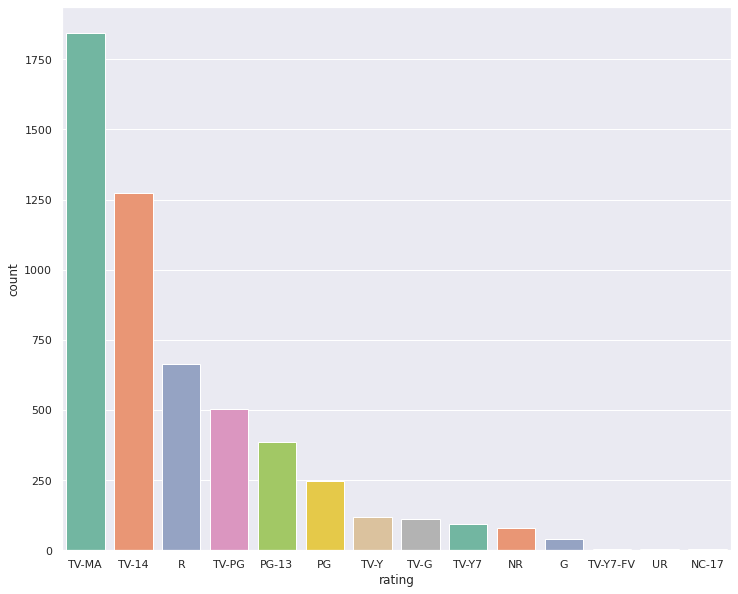

In [11]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

Jumlah film terbesar dibuat dengan peringkat 'TV-MA'. "TV-MA" adalah peringkat yang diberikan oleh Pedoman Orang Tua untuk program televisi yang dirancang hanya untuk pemirsa dewasa, dan  peringkat 'R' yang sangat populer. Film dengan peringkat R adalah film yang dinilai memiliki materi yang mungkin tidak cocok untuk anak-anak di bawah usia 17 tahun oleh Motion Picture Association of America; MPAA menulis "Di bawah 17 tahun membutuhkan pendamping orang tua atau wali dewasa".


# Year wise analysis

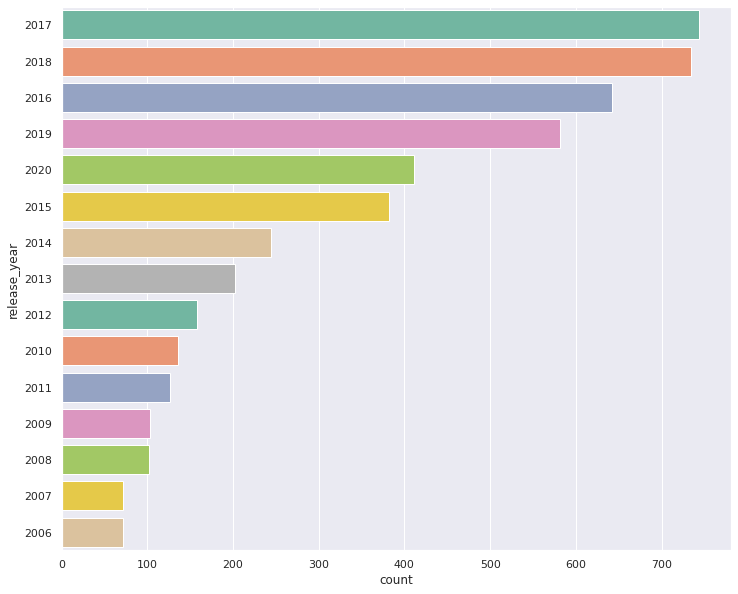

In [12]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

2017 adalah tahun ketika sebagian besar film dirilis

Pada tahun 2017,  merilis sebuah laporan manarik yang menunjukkan bahwa jumlah film di Netfilx meningkat sejak 2015, sementara  jumlah acara TV Show di Netflix menurun pada tahun 2012. 

Pada tahun 2017 adalah tahun ketika sebagian besar film pada aplikasi netflik dirilis, hingga mencapai sekitar 100 film yang di rilis, sehingga pada tahun 2017 lah menjadi year wise yang sempurna bagi perilisan film pada aplikasi netflix.

In [13]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#Highest Genre

In [14]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

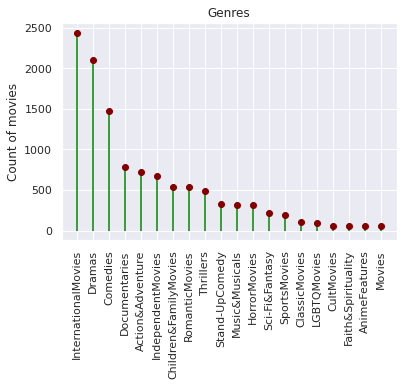

<Figure size 720x720 with 0 Axes>

In [15]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

International Movies, Comedy, dan Drama menjadi tiga Genre teratas yang memilikin jumlah konten tertinggi di Netflix

#MODELING

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [17]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [18]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [20]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [21]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [22]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [23]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [24]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [25]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


In [26]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [27]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [30]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [31]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

2419                                   Giri / Haji
6374                   The Frankenstein Chronicles
6693                         The Murder Detectives
3692                                        Loaded
3412                                 Kiss Me First
2616                                  Happy Valley
2381                                      Get Even
2846    How to Live Mortgage Free with Sarah Beeny
2886                                 I AM A KILLER
3013                      Inside the Criminal Mind
Name: title, dtype: object

In [32]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2168                                        Find Yourself
1590                                       Dancing Angels
4024                     Melodies of Life - Born This Way
3676                                        Little Things
1435    Club Friday To Be Continued - My Beautiful Tomboy
5219                                           Rishta.com
38                                    แผนร้ายนายเจ้าเล่ห์
294                                  Accidentally in Love
720                                     Bangkok Bachelors
1463                                      College Romance
Name: title, dtype: object